In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import struct
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend as K
import os
import idx2numpy

def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, f'{kind}-labels.idx1-ubyte')
    images_path = os.path.join(path, f'{kind}-images.idx3-ubyte')

    labels = idx2numpy.convert_from_file(labels_path)
    images = idx2numpy.convert_from_file(images_path).reshape(-1, 784)  # 28x28 images are flattened

    return images, labels


# RBF Katmanı için özel sınıf
class RBFNetworkLayer(tf.keras.layers.Layer):
    def __init__(self, neuron_count, spread, **kwargs):
        super(RBFNetworkLayer, self).__init__(**kwargs)
        self.neuron_count = neuron_count
        self.spread = K.cast_to_floatx(spread)

    def build(self, input_shape):
        self.centroids = self.add_weight(name='centroids',
                                         shape=(int(input_shape[1]), self.neuron_count),
                                         initializer='uniform',
                                         trainable=True)
        super(RBFNetworkLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.centroids
        l2 = K.sum(K.pow(diff, 2), axis=1)
        result = K.exp(-1 * self.spread * l2)
        return result

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.neuron_count)


# MNIST veri seti yolu
mnist_directory = 'C:/Users/ckasikci/Desktop/data'
train_data, train_targets = load_mnist(mnist_directory, kind='train')
test_data, test_targets = load_mnist(mnist_directory, kind='t10k')

# Veri düzenleme ve normalizasyon
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# Eğitim ve doğrulama veri setlerine bölme
X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(train_data, train_targets, test_size=0.2, random_state=10)

# RBF tabanlı model oluşturma ve eğitim
rbf_model_1 = Sequential()
rbf_model_1.add(RBFNetworkLayer(64, 0.2, input_shape=(784,)))
rbf_model_1.add(Dense(64, activation='relu'))
rbf_model_1.add(Dense(10, activation='softmax'))
rbf_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rbf_model_1.fit(X_train_set, y_train_set, epochs=5, batch_size=64, validation_data=(X_validation_set, y_validation_set))

rbf_model_2 = Sequential()
rbf_model_2.add(RBFNetworkLayer(128, 0.2, input_shape=(784,)))
rbf_model_2.add(Dense(64, activation='relu'))
rbf_model_2.add(Dense(10, activation='softmax'))
rbf_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rbf_model_2.fit(X_train_set, y_train_set, epochs=5, batch_size=64, validation_data=(X_validation_set, y_validation_set))

rbf_model_3 = Sequential()
rbf_model_3.add(RBFNetworkLayer(256, 0.2, input_shape=(784,)))
rbf_model_3.add(Dense(64, activation='relu'))
rbf_model_3.add(Dense(10, activation='softmax'))
rbf_model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rbf_model_3.fit(X_train_set, y_train_set, epochs=5, batch_size=64, validation_data=(X_validation_set, y_validation_set))

# Modellerin performansını değerlendirme
for rbf_model in [rbf_model_1, rbf_model_2, rbf_model_3]:
    test_predictions = np.argmax(rbf_model.predict(test_data), axis=1)
    model_accuracy = accuracy_score(test_targets, test_predictions)
    print(f"RBF Model Accuracy: {model_accuracy}")




Epoch 1/5


750/750 [==============================] - 12s 15ms/step - loss: 2.1559 - accuracy: 0.1716 - val_loss: 2.0098 - val_accuracy: 0.2078
Epoch 2/5
750/750 [==============================] - 12s 16ms/step - loss: 1.9896 - accuracy: 0.2189 - val_loss: 1.9749 - val_accuracy: 0.2102
Epoch 3/5
750/750 [==============================] - 13s 17ms/step - loss: 1.9712 - accuracy: 0.2253 - val_loss: 1.9590 - val_accuracy: 0.2184
Epoch 4/5
750/750 [==============================] - 12s 16ms/step - loss: 1.9011 - accuracy: 0.2698 - val_loss: 1.8191 - val_accuracy: 0.3038
Epoch 5/5
750/750 [==============================] - 12s 16ms/step - loss: 1.7666 - accuracy: 0.3314 - val_loss: 1.7123 - val_accuracy: 0.3554
Epoch 1/5
750/750 [==============================] - 24s 32ms/step - loss: 2.1648 - accuracy: 0.1718 - val_loss: 2.0421 - val_accuracy: 0.2123
Epoch 2/5
750/750 [==============================] - 24s 32ms/step - loss: 1.9989 - accuracy: 0.2134 - val_loss: 1.9763 - val_accuracy: 0.

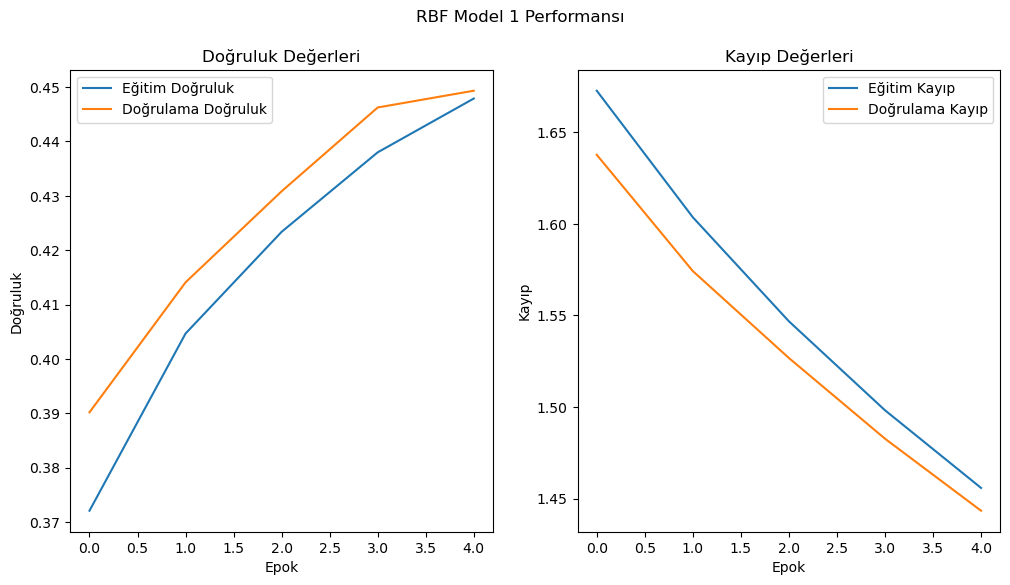

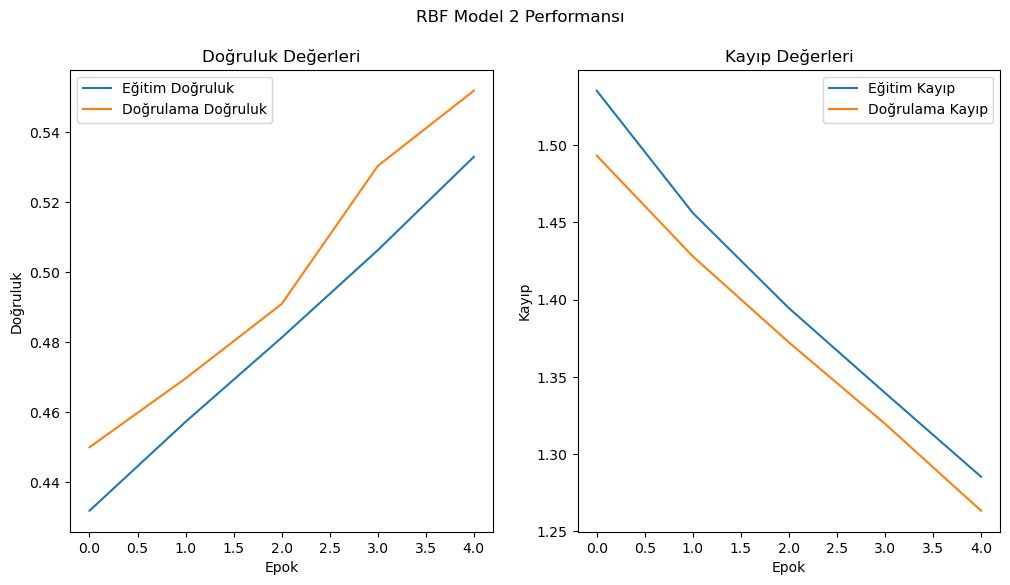

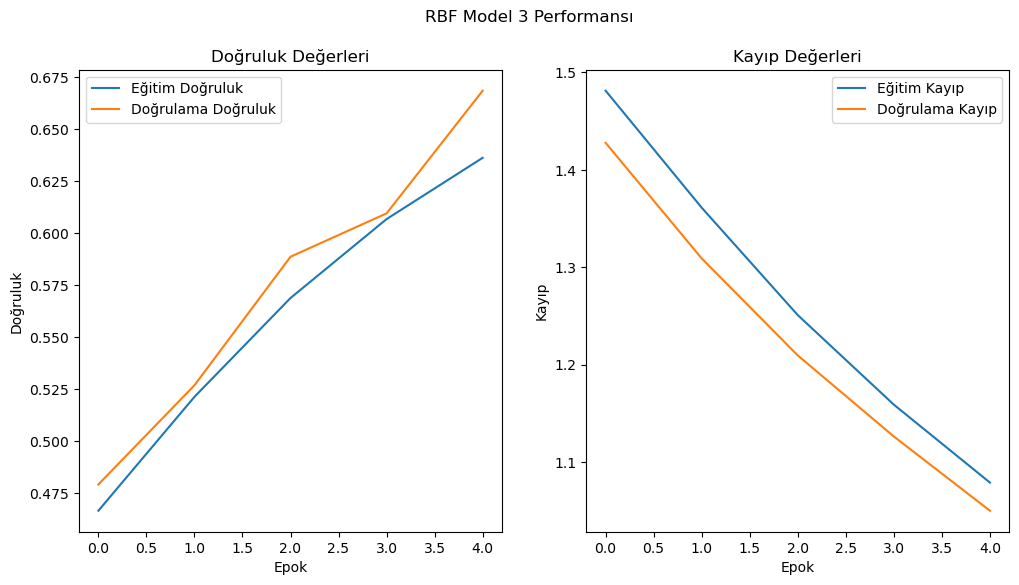

In [7]:
import matplotlib.pyplot as plt

# Fonksiyon: Eğitim sırasındaki doğruluk ve kayıp değerlerini çiz
def plot_history(history, title='Model Performansı'):
    plt.figure(figsize=(12, 6))

    # Eğitim ve doğrulama doğruluk değerleri
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluk')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluk')
    plt.title('Doğruluk Değerleri')
    plt.xlabel('Epok')
    plt.ylabel('Doğruluk')
    plt.legend()

    # Eğitim ve doğrulama kayıp değerleri
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Eğitim Kayıp')
    plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
    plt.title('Kayıp Değerleri')
    plt.xlabel('Epok')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.suptitle(title)
    plt.show()

# Model 1 için eğitim
training_history_1 = rbf_model_1.fit(X_train_set, y_train_set, epochs=5, batch_size=64, validation_data=(X_validation_set, y_validation_set), verbose=0)

# Model 2 için eğitim
training_history_2 = rbf_model_2.fit(X_train_set, y_train_set, epochs=5, batch_size=64, validation_data=(X_validation_set, y_validation_set), verbose=0)

# Model 3 için eğitim
training_history_3 = rbf_model_3.fit(X_train_set, y_train_set, epochs=5, batch_size=64, validation_data=(X_validation_set, y_validation_set), verbose=0)

# Performansı çizdirme
plot_history(training_history_1, title='RBF Model 1 Performansı')
plot_history(training_history_2, title='RBF Model 2 Performansı')
plot_history(training_history_3, title='RBF Model 3 Performansı')
